# Plot the efficiency of iterations and policies

Note: please run `make_data.py` before exec

In [6]:
# setting
SCR_DIR = './../master_mind'
DATA_DIR = './storage'

import sys
sys.path.append(SCR_DIR)

In [7]:
import pickle
from itertools import product
from numpy import mean
import matplotlib.pyplot as plt

In [8]:
def axplot(Xs, Ys, labels, title, xlabel, ylabel, ax, yscale='linear'):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(Xs[0])
    ax.set_yscale(yscale)
    for X, Y, label in zip(Xs, Ys, labels):
        ax.plot(X, Y, 'o--', label=label)
    ax.legend()
    ax.grid()

# Code Iteration

## Running time, Number of iterations and mean turn (COLOR = 6 fixed)

In [14]:
with open(DATA_DIR +'/data1/config.pickle', 'rb') as pf:
    config = pickle.load(pf)
    
Cs = config['Cs']
Ps = config['Ps']
iter_names = config['iter_names']
policy_names = config['policy_names']

C = Cs
policy_name = policy_names[0]
data1 = dict()
for C, P, iter_name, policy_name in product(Cs, Ps, iter_names, policy_names):
    with open(DATA_DIR + '/data1/{}_{}_{}_{}.pickle'.format(C, P, iter_name, policy_name), 'rb') as pf:
        data1[C, P, iter_name, policy_name] = pickle.load(pf)

(0.0, 1.0, 0.0, 1.0)

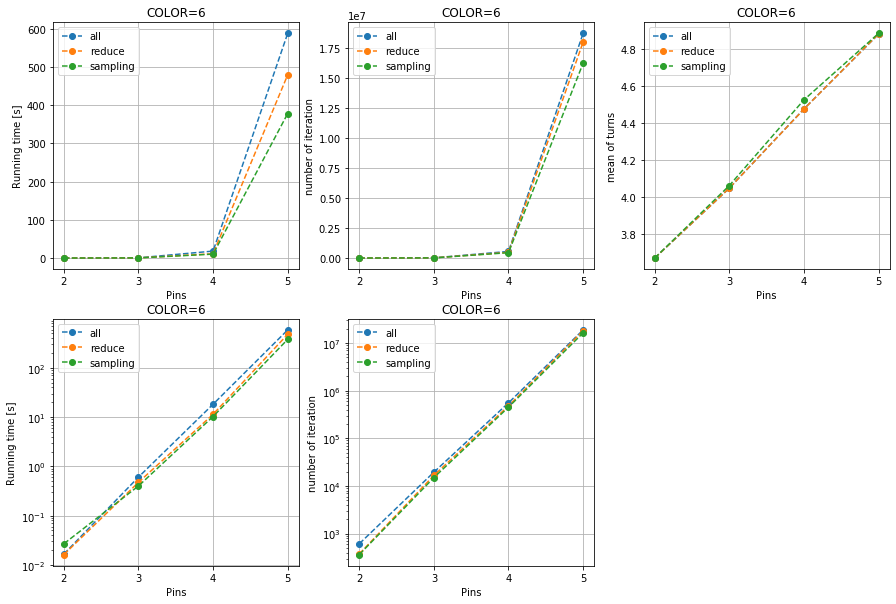

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

Xs = [Ps]*len(iter_names)
Ys = [
    [data1[C, p, iter_name, policy_name][0].running_time for p in Ps]
    for iter_name in iter_names
]
axplot(
    Xs, Ys, iter_names, title='COLOR={}'.format(C),
    xlabel='Pins', ylabel='Running time [s]', ax=ax[0, 0]
)
axplot(
    Xs, Ys, iter_names, title='COLOR={}'.format(C),
    xlabel='Pins', ylabel='Running time [s]', ax=ax[1, 0], yscale='log'
)

Ys = [
    [data1[C, p, iter_name, policy_name][1].code_iter.n_iteration for p in Ps]
    for iter_name in iter_names
]
axplot(
    Xs, Ys, iter_names, title='COLOR={}'.format(C),
    xlabel='Pins', ylabel='number of iteration', ax=ax[0, 1]
)
axplot(
    Xs, Ys, iter_names, title='COLOR={}'.format(C),
    xlabel='Pins', ylabel='number of iteration', ax=ax[1, 1], yscale='log'
)

Ys = [
    [mean(data1[C, p, iter_name, policy_name][0].turns) for p in Ps]
    for iter_name in iter_names
]
axplot(
    Xs, Ys, iter_names, title='COLOR={}'.format(C),
    xlabel='Pins', ylabel='mean of turns', ax=ax[0, 2]
)

ax[0, 1].ticklabel_format(style="sci", axis="y", scilimits=(0,0))
ax[1, 2].axis("off")

### Running time and Number of iterations (PIN fixed)

In [26]:
with open(DATA_DIR +'/data2/config.pickle', 'rb') as pf:
    config = pickle.load(pf)
    
Cs = config['Cs']
Ps = config['Ps']
iter_names = config['iter_names']
policy_names = config['policy_names']

C = Cs
policy_name = policy_names[0]
data2 = dict()
for C, P, iter_name, policy_name in product(Cs, Ps, iter_names, policy_names):
    with open(DATA_DIR + '/data2/{}_{}_{}_{}.pickle'.format(C, P, iter_name, policy_name), 'rb') as pf:
        data2[C, P, iter_name, policy_name] = pickle.load(pf)

(0.0, 1.0, 0.0, 1.0)

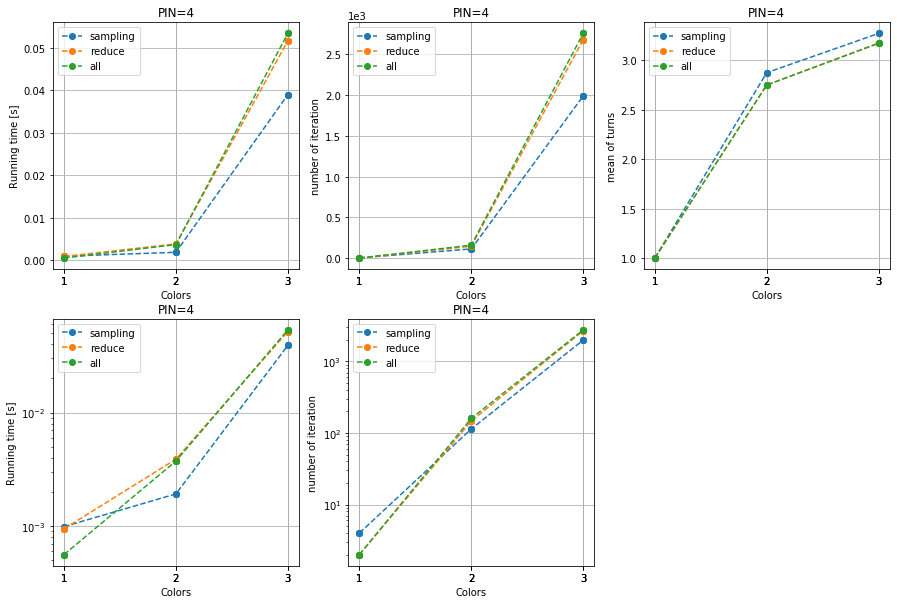

In [27]:
Cs = sorted(list(c for c, _, _, _ in data2.keys()))
P = set(p for _, p, _, _ in data2.keys()).pop()
iter_names = set(itn for _, _, itn, _ in data2.keys())
policy_name = 'minmax'

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

Xs = [Cs]*len(iter_names)
Ys = [
    [data2[c, P, iter_name, policy_name][0].running_time for c in Cs]
    for iter_name in iter_names
]
axplot(
    Xs, Ys, iter_names, title='PIN={}'.format(P),
    xlabel='Colors', ylabel='Running time [s]', ax=ax[0, 0]
)
axplot(
    Xs, Ys, iter_names, title='PIN={}'.format(P),
    xlabel='Colors', ylabel='Running time [s]', ax=ax[1, 0], yscale='log'
)

Ys = [
    [data2[c, P, iter_name, policy_name][1].code_iter.n_iteration for c in Cs]
    for iter_name in iter_names
]
axplot(
    Xs, Ys, iter_names, title='PIN={}'.format(P),
    xlabel='Colors', ylabel='number of iteration', ax=ax[0, 1]
)
axplot(
    Xs, Ys, iter_names, title='PIN={}'.format(P),
    xlabel='Colors', ylabel='number of iteration', ax=ax[1, 1], yscale='log'
)

Ys = [
    [mean(data2[c, P, iter_name, policy_name][0].turns) for c in Cs]
    for iter_name in iter_names
]
axplot(
    Xs, Ys, iter_names, title='PIN={}'.format(P),
    xlabel='Colors', ylabel='mean of turns', ax=ax[0, 2]
)

ax[0, 1].ticklabel_format(style="sci", axis="y", scilimits=(0,0))
ax[1, 2].axis("off")